In [5]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import import_ipynb
import lsh  
import time
from sklearn.neighbors import NearestNeighbors
import tracemalloc

In [6]:
def compare_knn_performance(N_values, D_values, K_values):
    results = []
    for N in N_values:
        for D in D_values:
            data = np.random.rand(N, D)  # Generate random data
            query_point = np.random.rand(1, D).flatten()  # Random query point

            # Custom KDTree (approximate)
            tracemalloc.start()
            start_time = time.time()
            approx_tree = lsh.LSH()
            approx_tree.fit(data, K_values[0])
            approx_train_time = time.time() - start_time
            approx_train_memory = tracemalloc.get_traced_memory()[1]  # Peak memory usage
            tracemalloc.stop()

            tracemalloc.start()
            start_time = time.time()
            approx_tree.predict(query_point)
            approx_query_time = time.time() - start_time
            approx_query_memory = tracemalloc.get_traced_memory()[1]
            tracemalloc.stop()

            
            tracemalloc.start()
            exact_tree = NearestNeighbors(n_neighbors=K_values[0], algorithm='brute').fit(data)
            exact_train_memory = tracemalloc.get_traced_memory()[1]
            tracemalloc.stop()

            tracemalloc.start()
            start_time = time.time()
            exact_dists, exact_idx = exact_tree.kneighbors(query_point.reshape(1, -1))
            exact_query_time = time.time() - start_time
            exact_query_memory = tracemalloc.get_traced_memory()[1]
            tracemalloc.stop()

            # Store results
            results.append({
                'N': N,
                'D': D,
                'K': K_values[0],
                'approx_train_time': approx_train_time,
                'approx_query_time': approx_query_time,
                'approx_train_memory': approx_train_memory,
                'approx_query_memory': approx_query_memory,
                'exact_train_memory': exact_train_memory,
                'exact_query_memory': exact_query_memory,
            })

    return results


In [7]:
# Usage example
N_values = [100, 250, 500, 1000, 2500,3000, 4000, 5000]  # Different dataset sizes
D_values = [2, 5, 10, 20, 50]        # Different dimensions
K_values = [5, 10, 20]       # Different K values

In [8]:
# Compare performance
performance_results = compare_knn_performance(N_values, D_values, K_values)
performance_results

[{'N': 100,
  'D': 2,
  'K': 5,
  'approx_train_time': 0.40801310539245605,
  'approx_query_time': 0.0047321319580078125,
  'approx_train_memory': 10987680,
  'approx_query_memory': 9000,
  'exact_train_memory': 4221,
  'exact_query_memory': 10738},
 {'N': 100,
  'D': 5,
  'K': 5,
  'approx_train_time': 0.2978496551513672,
  'approx_query_time': 0.0030069351196289062,
  'approx_train_memory': 152024,
  'approx_query_memory': 9000,
  'exact_train_memory': 6557,
  'exact_query_memory': 10348},
 {'N': 100,
  'D': 10,
  'K': 5,
  'approx_train_time': 0.2984039783477783,
  'approx_query_time': 0.002971172332763672,
  'approx_train_memory': 180344,
  'approx_query_memory': 9024,
  'exact_train_memory': 10557,
  'exact_query_memory': 10308},
 {'N': 100,
  'D': 20,
  'K': 5,
  'approx_train_time': 0.2979869842529297,
  'approx_query_time': 0.002980947494506836,
  'approx_train_memory': 220760,
  'approx_query_memory': 9024,
  'exact_train_memory': 18557,
  'exact_query_memory': 10308},
 {'N': 

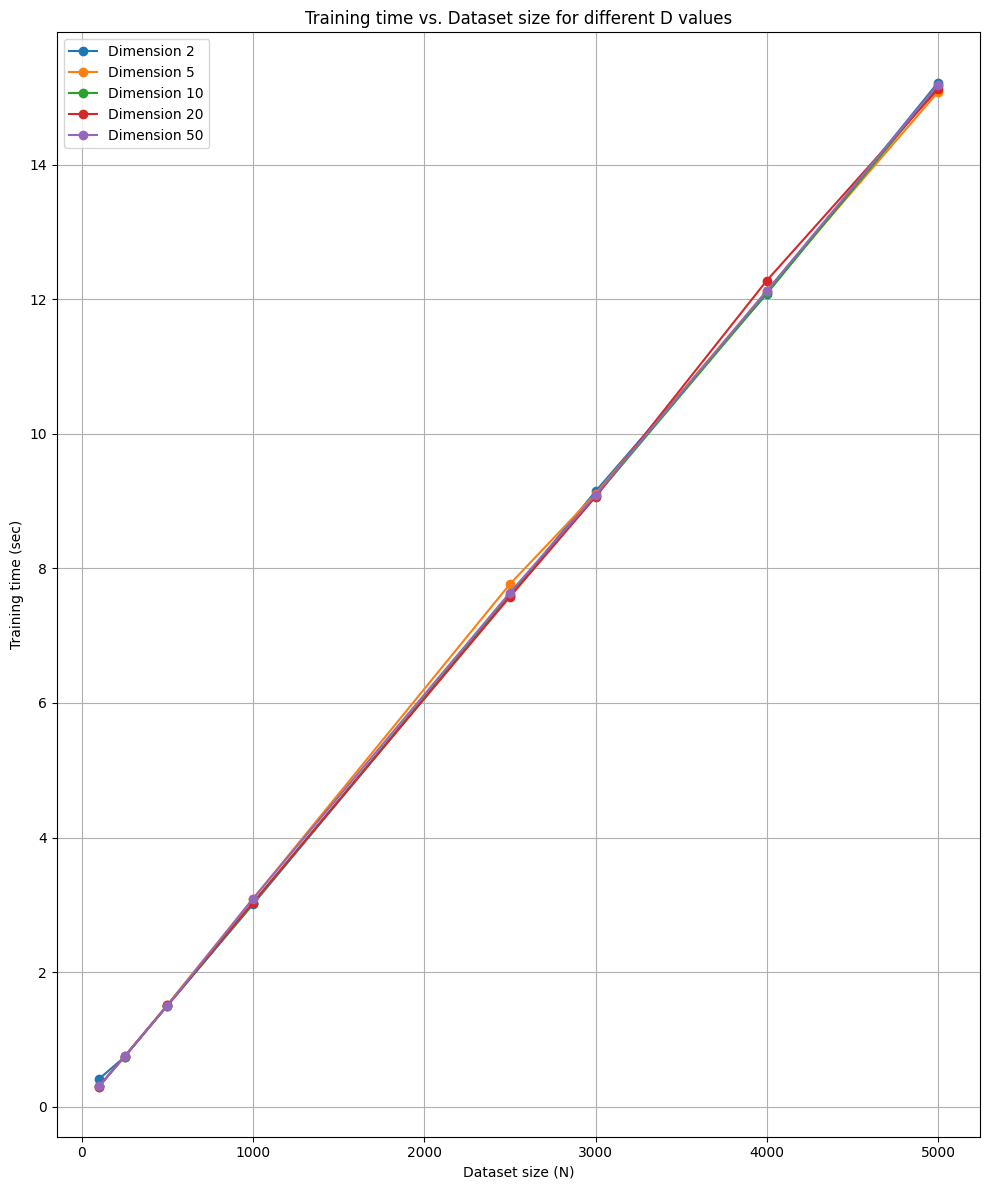

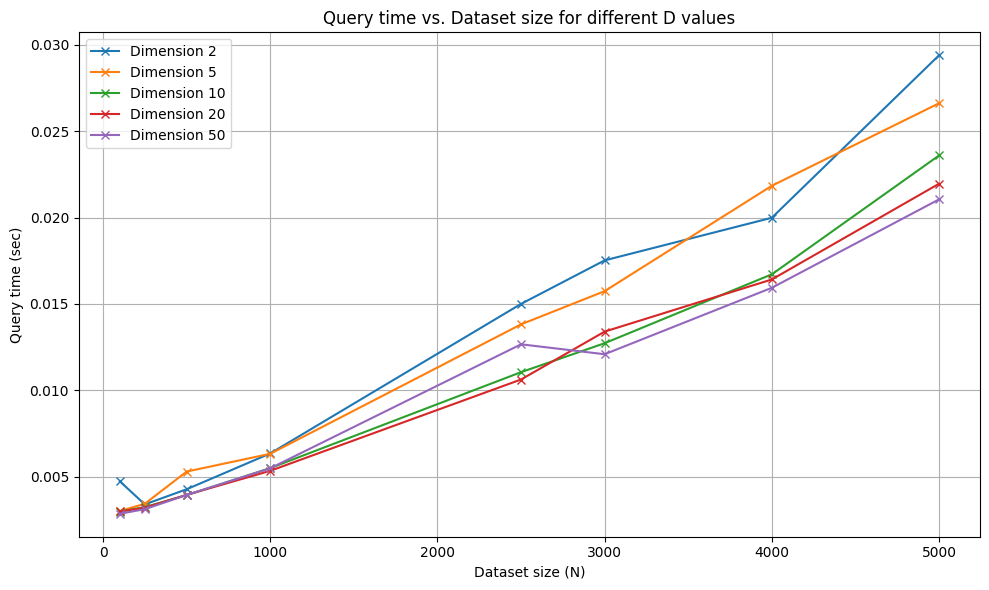

In [9]:


# Create arrays for training and query times for different dimensions
training_times_LSH = np.zeros((len(N_values), len(D_values)))
query_times_LSH = np.zeros((len(N_values), len(D_values)))

# Fill the arrays with data from performance_results
for i, N in enumerate(N_values):
    for j, D in enumerate(D_values):
        entry = next((x for x in performance_results if x['N'] == N and x['D'] == D), None)
        if entry:
            training_times_LSH[i, j] = entry['approx_train_time']
            query_times_LSH[i, j] = entry['approx_query_time']

# Plot Training time vs Dataset size (N) for different D values
plt.figure(figsize=(10, 12))
for j, D in enumerate(D_values):
    plt.plot(N_values, training_times_LSH[:, j], marker='o', label=f'Dimension {D}')
plt.xlabel('Dataset size (N)')
plt.ylabel('Training time (sec)')
plt.title('Training time vs. Dataset size for different D values')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Query time vs Dataset size (N) for different D values
plt.figure(figsize=(10, 6))
for j, D in enumerate(D_values):
    plt.plot(N_values, query_times_LSH[:, j], marker='x', label=f'Dimension {D}')
plt.xlabel('Dataset size (N)')
plt.ylabel('Query time (sec)')
plt.title('Query time vs. Dataset size for different D values')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


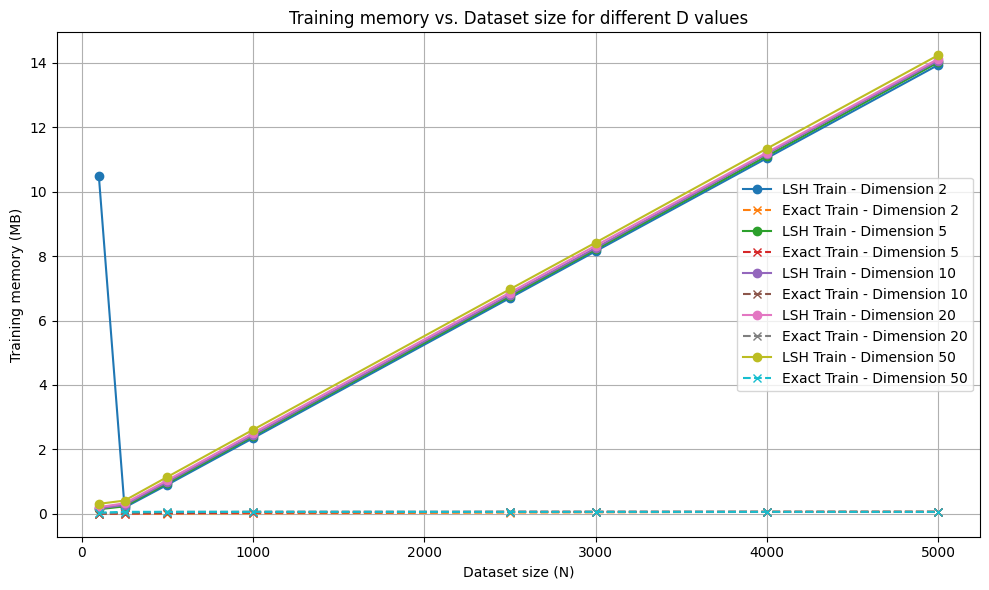

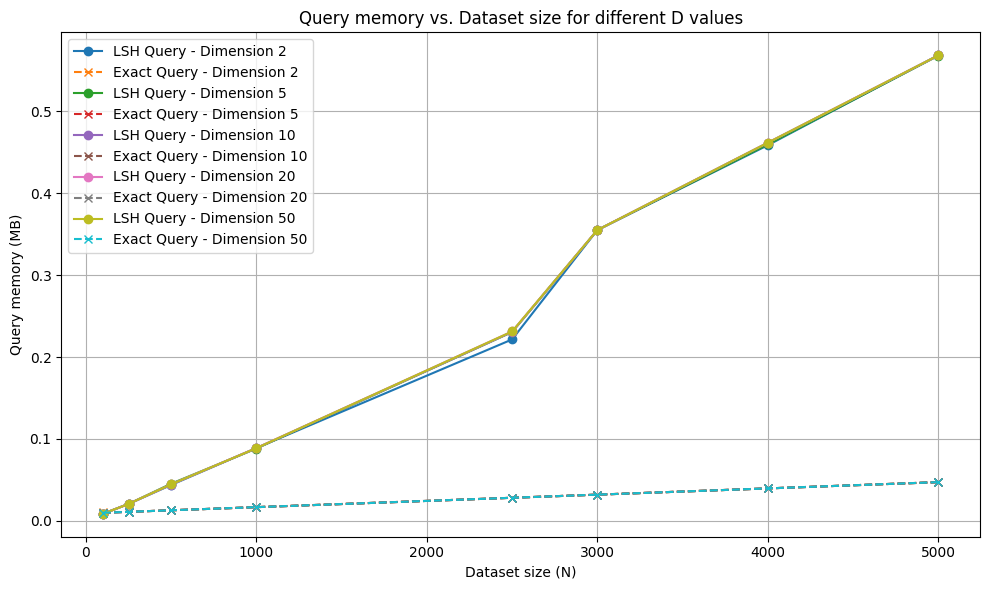

In [10]:
import matplotlib.pyplot as plt

# Create arrays for memory usage for different dimensions
memory_train_LSH = np.zeros((len(N_values), len(D_values)))
memory_query_LSH = np.zeros((len(N_values), len(D_values)))
memory_train_exact = np.zeros((len(N_values), len(D_values)))
memory_query_exact = np.zeros((len(N_values), len(D_values)))

# Fill the arrays with data from performance_results
for i, N in enumerate(N_values):
    for j, D in enumerate(D_values):
        entry = next((x for x in performance_results if x['N'] == N and x['D'] == D), None)
        if entry:
            memory_train_LSH[i, j] = entry['approx_train_memory'] / (1024 * 1024)  # Convert to MB
            memory_query_LSH[i, j] = entry['approx_query_memory'] / (1024 * 1024)  # Convert to MB
            memory_train_exact[i, j] = entry['exact_train_memory'] / (1024 * 1024)
            memory_query_exact[i, j] = entry['exact_query_memory'] / (1024 * 1024)

# Plot Training memory vs Dataset size (N) for different D values
plt.figure(figsize=(10, 6))
for j, D in enumerate(D_values):
    plt.plot(N_values, memory_train_LSH[:, j], marker='o', label=f'LSH Train - Dimension {D}')
    plt.plot(N_values, memory_train_exact[:, j], marker='x', linestyle='--', label=f'Exact Train - Dimension {D}')
plt.xlabel('Dataset size (N)')
plt.ylabel('Training memory (MB)')
plt.title('Training memory vs. Dataset size for different D values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Query memory vs Dataset size (N) for different D values
plt.figure(figsize=(10, 6))
for j, D in enumerate(D_values):
    plt.plot(N_values, memory_query_LSH[:, j], marker='o', label=f'LSH Query - Dimension {D}')
    plt.plot(N_values, memory_query_exact[:, j], marker='x', linestyle='--', label=f'Exact Query - Dimension {D}')
plt.xlabel('Dataset size (N)')
plt.ylabel('Query memory (MB)')
plt.title('Query memory vs. Dataset size for different D values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
# Correcting the visualization of missed neighbors
def visualize_missed_neighbors(data_points,query_point,N=200, K=10):
    # Generate random 2D dataset
       # Random query point

    # Instantiate LSH and exact nearest neighbor models
    lsh_model = lsh.LSH(num_hash_tables=10)
    lsh_model.fit(data_points, k=K)
    exact_tree = NearestNeighbors(n_neighbors=K, algorithm='brute').fit(data_points)

    # Find neighbors
    approx_neighbours = np.array([data_points[idx] for idx in lsh_model.predict(query_point[0])])
    exact_dists, exact_idx = exact_tree.kneighbors(query_point)
    exact_neighbours = data_points[exact_idx[0]]

    # Identify missed neighbors
    missed_neighbours = []
    for i in range(K):
        if not any(np.all(exact_neighbours[i] == approx_neighbours, axis=1)):
            missed_neighbours.append(exact_neighbours[i])  # Store the coordinates of missed neighbors

    missed_neighbours = np.array(missed_neighbours)  # Convert to numpy array

    # Plot data points, query point, and neighbors
    plt.figure(figsize=(8, 8))
    plt.scatter(data_points[:, 0], data_points[:, 1], c='blue', s=15, label="Data Points")
    plt.scatter(query_point[:, 0], query_point[:, 1], c='red',  s=50, label="Query Point")
    plt.scatter(exact_neighbours[:, 0], exact_neighbours[:, 1], c='green', s=50, label="Exact Neighbors")
    if len(missed_neighbours) > 0:
        plt.scatter(missed_neighbours[:, 0], missed_neighbours[:, 1], c='orange',marker='x', s=50, label="Missed Neighbors")
    plt.scatter(approx_neighbours[:, 0], approx_neighbours[:, 1], label='Approx neighbors', c='orange', marker='^')
    plt.legend()
    plt.title(f"Missed Neighbors (K={K})")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.grid(True)
    plt.show()


In [12]:
N=200
K=10
data_points = np.random.rand(N, 2)
query_point = np.random.rand(1, 2)

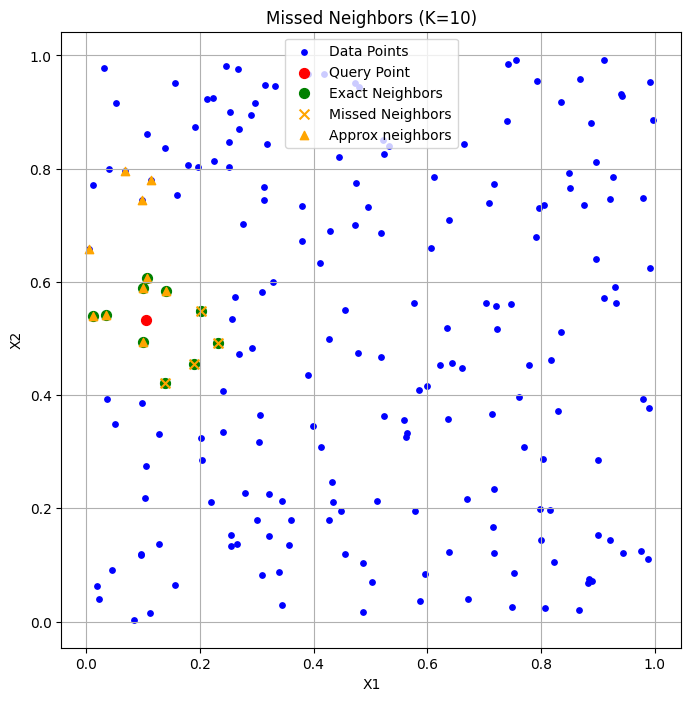

In [33]:
# Visualize missed neighbors for 2D dataset

visualize_missed_neighbors(data_points,query_point,200, 10)

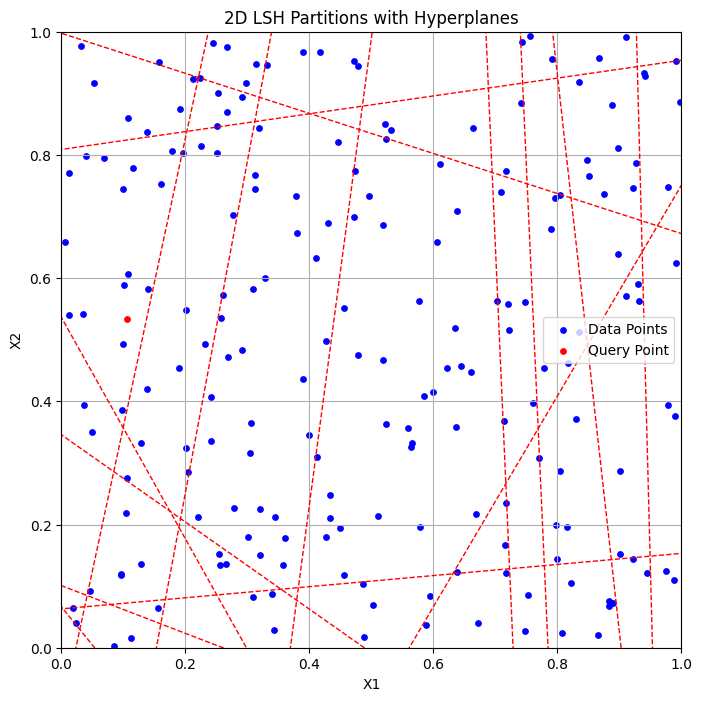

In [43]:


# Define a function to visualize the partitions in 2D space for LSH
def visualize_lsh_partitions(lsh_model, data_points, num_partitions=5):
    """
    Plots the 2D space with LSH partitions. Only the first few hyperplanes from each hash table are drawn
    as lines dividing the space.

    Parameters:
        lsh_model: Trained LSH model.
        data_points: Original 2D data points for context.
        num_partitions: Number of hyperplanes to show per hash table.
    """
    plt.figure(figsize=(8, 8))
    plt.scatter(data_points[:, 0], data_points[:, 1], c='blue', marker='o', s=15, label="Data Points")
    plt.scatter(query_point[:,0],query_point[:,1], c='red', marker='o', s=15, label="Query Point")
    # Loop over each hash table's hyperplanes and plot them
    for i in range(min(lsh_model.num_hash_tables, num_partitions)):
        for j in range(min(lsh_model.k, num_partitions)):
            # Extract a hyperplane (normal vector + bias term)
            hyperplane = lsh_model.hyperplanes[i, j]
            normal_vector, bias = hyperplane[:-1], -hyperplane[-1]
            
            # Calculate line endpoints from the normal vector and bias term
            if normal_vector[1] != 0:  # Avoid division by zero for vertical lines
                x_vals = np.array([data_points[:, 0].min() - 1, data_points[:, 0].max() + 1])
                y_vals = (-normal_vector[0] * x_vals - bias) / normal_vector[1]
            else:
                y_vals = np.array([data_points[:, 1].min() - 1, data_points[:, 1].max() + 1])
                x_vals = np.full(y_vals.shape, -bias / normal_vector[0])

            # Plot the hyperplane as a line
            plt.plot(x_vals, y_vals, 'r--', linewidth=1)

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('2D LSH Partitions with Hyperplanes')
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 1)
    plt.xlim(0, 1)
    plt.show()


# exec(l)  # Execute the code for defining the LSH class
lsh_model = lsh.LSH(num_hash_tables=10)  # Using fewer tables for simplicity in visualization
lsh_model.fit(data_points, k=10)

# Visualize partitions using the trained LSH model
visualize_lsh_partitions(lsh_model, data_points)
